# Import

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
print(sys.executable)

c:\Users\gqola\.conda\envs\kaggle-student-scores\python.exe


# Data Loading

In [3]:

train_path = "C:/Users/gqola/Documents/projects/kaggle-playground-2026-student-scores/data/raw/playground-series-s6e1/train.csv"
train_df = pd.read_csv(train_path)
train_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [5]:
train_df.shape

(630000, 13)

In [6]:
train_df.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [7]:
X= train_df.drop(columns=["exam_score"])
y= train_df["exam_score"]

print(X.shape)
print(y.shape)

(630000, 12)
(630000,)


# Exploratory Data Analysis (EDA)

In [8]:
sns.set(style="whitegrid")

In [9]:
#train_df.isna() #gives a boolean table indicating True for null values. 
train_df.isna().sum()

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [10]:
train_df.duplicated().sum()

np.int64(0)

In [11]:
train_df.describe(include="object") #Summary for all categorical columns

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,630000,630000,630000,630000,630000,630000,630000
unique,3,7,2,3,5,3,3
top,other,b.tech,yes,poor,coaching,medium,moderate
freq,211097,131236,579423,213675,131697,214082,353982


In [16]:
categorical_cols = ["gender", "course", "internet_access", "sleep_quality", "study_method","facility_rating", "exam_difficulty"]

In [17]:
for col in categorical_cols:
    print(f"Value counts for {col}: \n {train_df[col].value_counts()}")

Value counts for gender: 
 gender
other     211097
male      210593
female    208310
Name: count, dtype: int64
Value counts for course: 
 course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64
Value counts for internet_access: 
 internet_access
yes    579423
no      50577
Name: count, dtype: int64
Value counts for sleep_quality: 
 sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64
Value counts for study_method: 
 study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64
Value counts for facility_rating: 
 facility_rating
medium    214082
low       212378
high      203540
Name: count, dtype: int64
Value counts for exam_difficulty: 
 exam_difficulty
moderate    353982
easy        176540
hard         99478
Name: count, dtype: int64


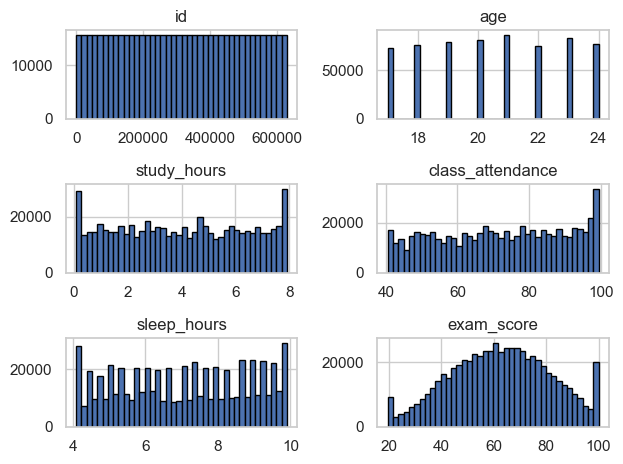

In [23]:
train_df.hist(bins=40, edgecolor="black")
plt.tight_layout()
plt.show()

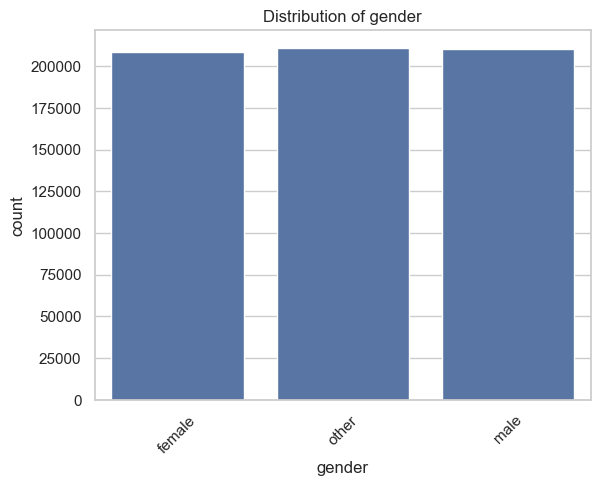

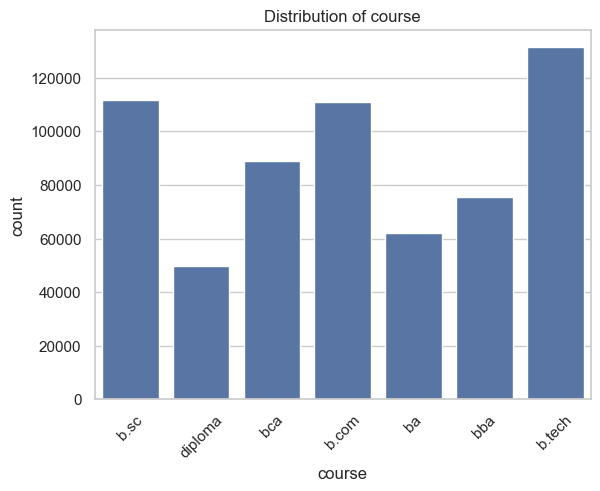

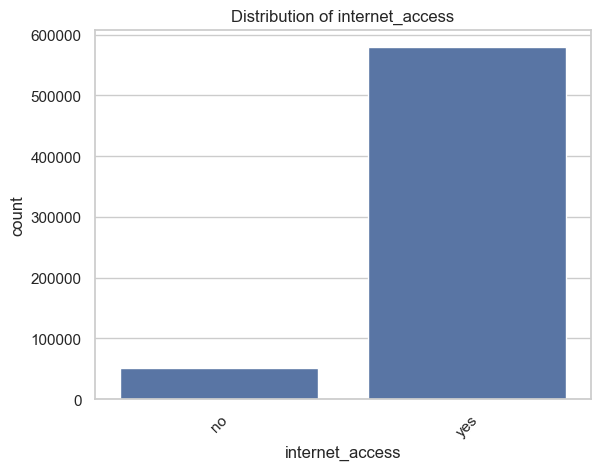

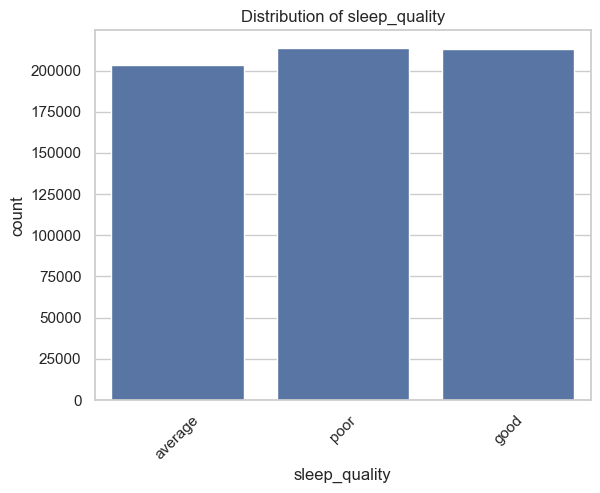

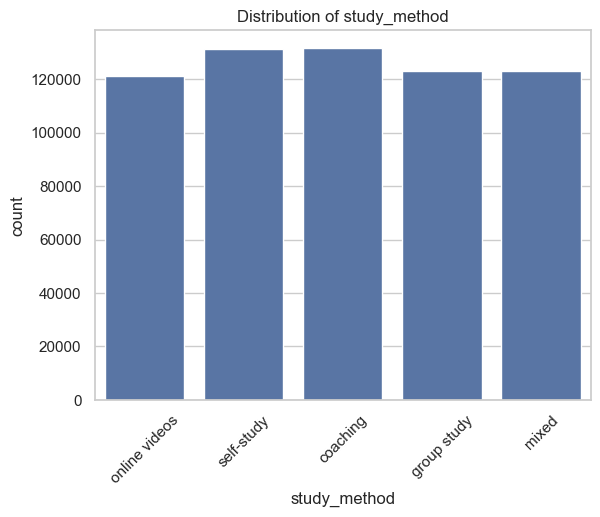

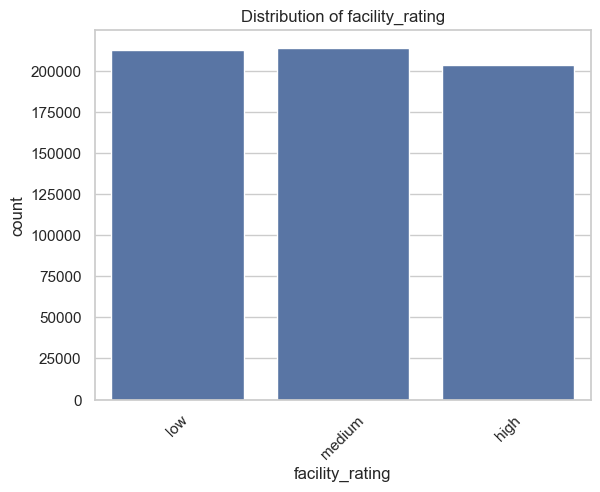

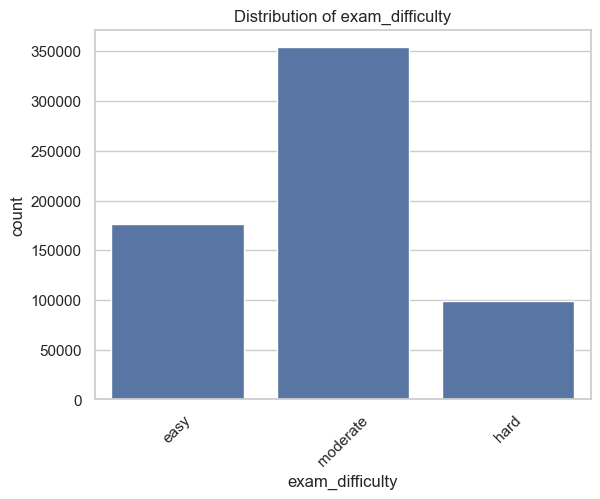

In [24]:
for col in categorical_cols:
    sns.countplot(data=train_df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

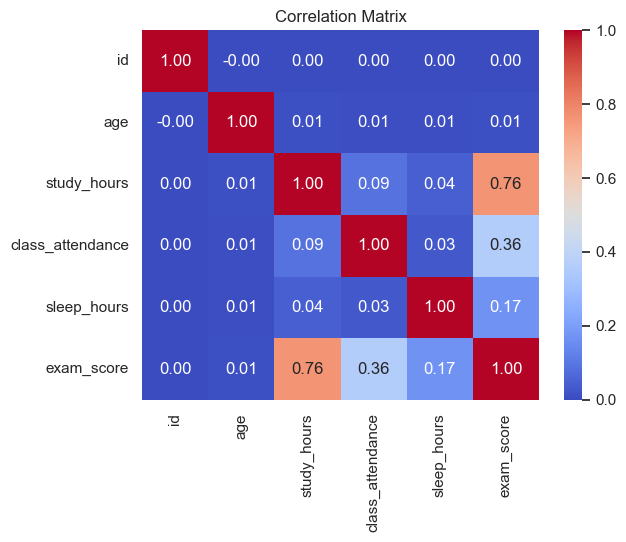

In [27]:
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The correlation matric for non-categorical data shows that there's a positive correlation between `study_hours` and `exam_score`. Meaning when the study hours increase so will the exam score. `class_attendance` positive-weak correlation while the other columns have no significant correllation to  `exam_score`

In [28]:
numeric_cols = ["age","study_hours","class_attendance", "sleep_hours"]

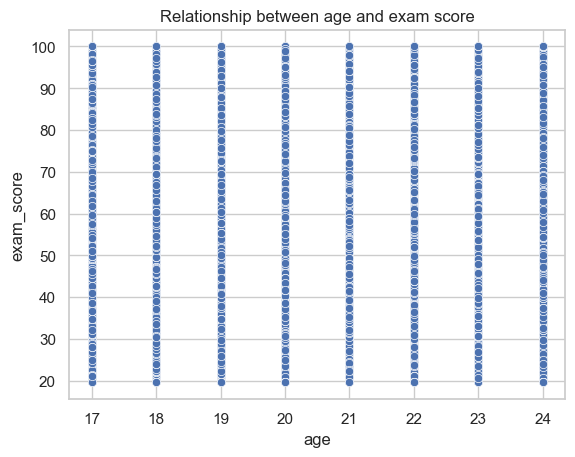

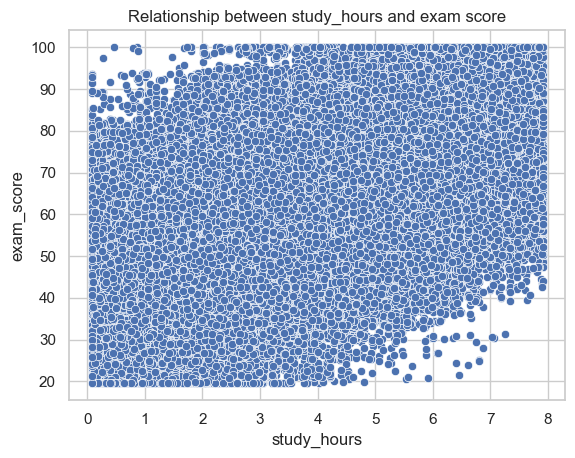

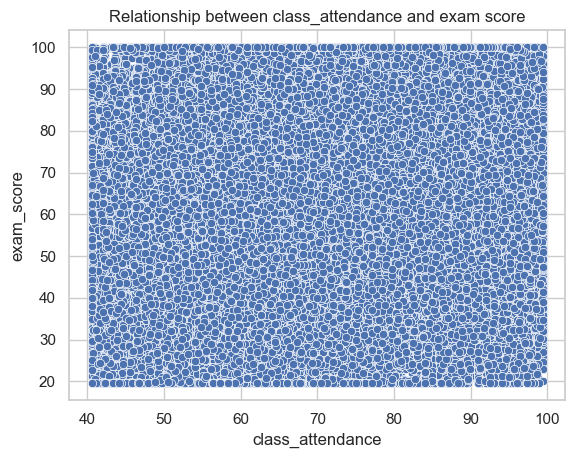

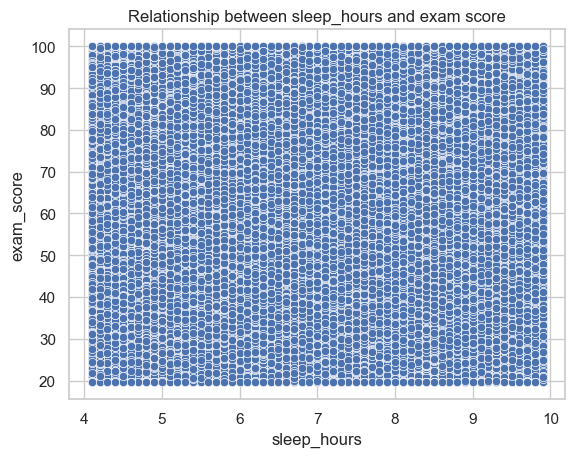

In [30]:
for feature in numeric_cols:
    sns.scatterplot(data=train_df, x = feature, y="exam_score")
    plt.title(f"Relationship between {feature} and exam score")
    plt.show()

Simillarly to the correlation matrix the scatter plots serve as an additional visual that shows the relationship/correlation between exam score and said feature. Here we see that none of the features excluding study_hours have a clear relationship. While the `study_hours` has correlation it should be noted that this is not significantly high (>90) hense there non-linear pattern in the plot. 

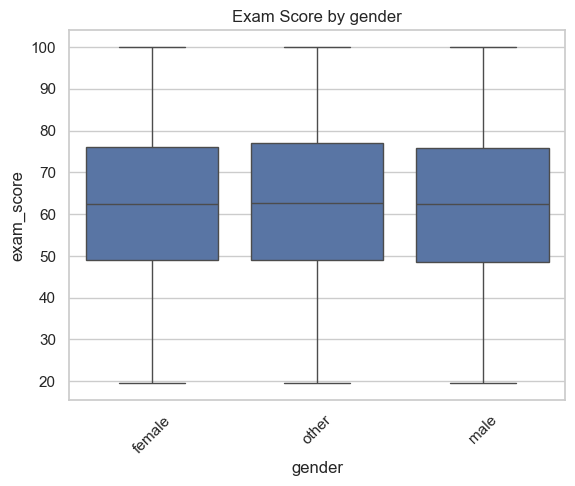

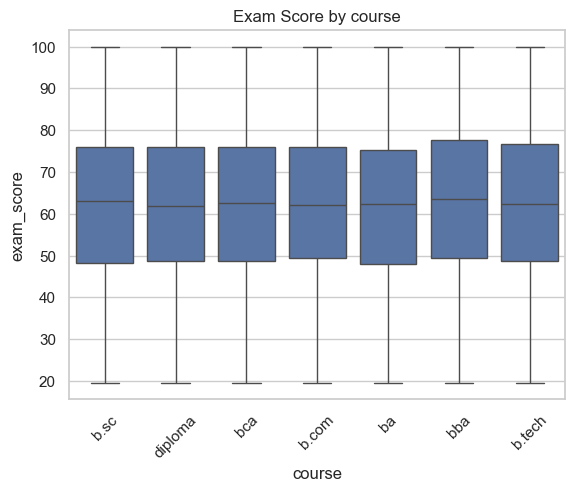

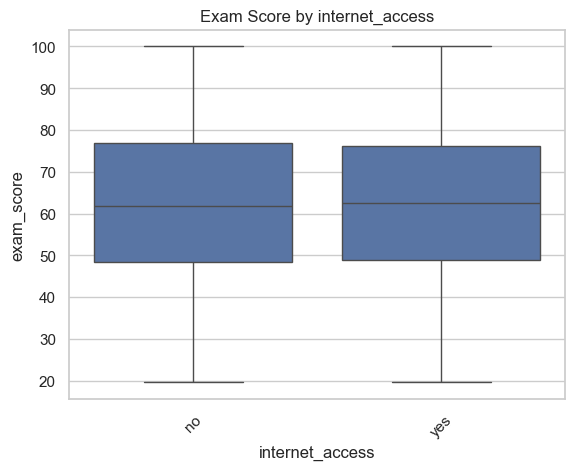

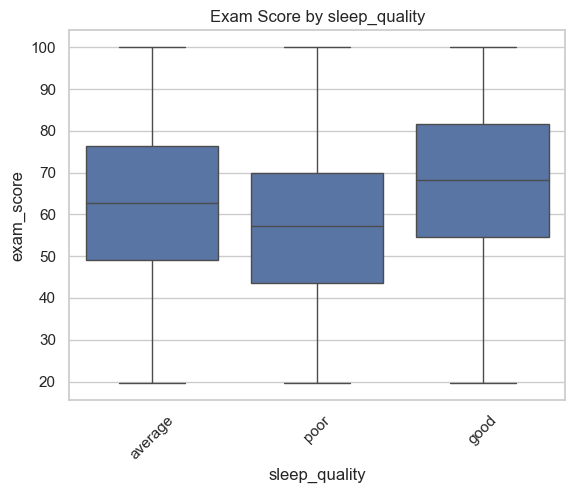

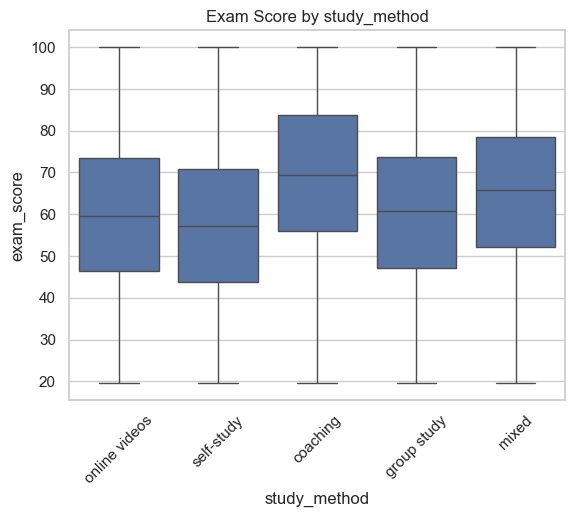

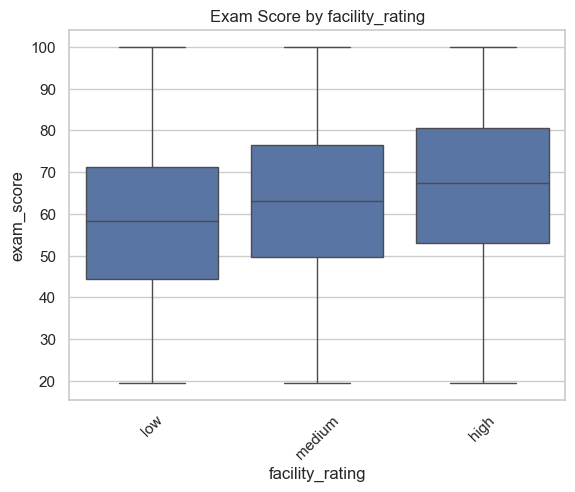

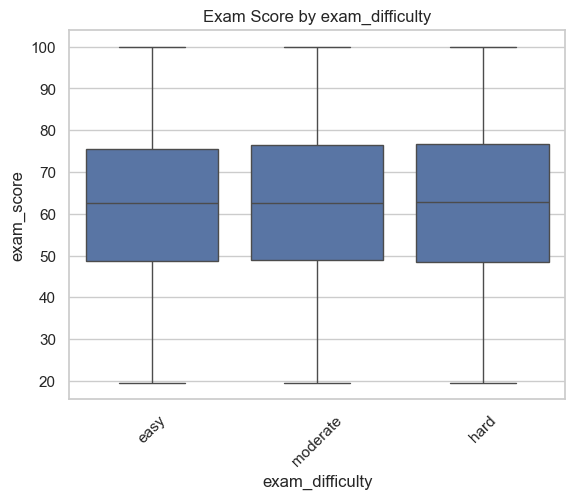

In [32]:
for col in categorical_cols:
    sns.boxplot(data=train_df, x=col, y="exam_score")
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering

In [35]:
features = ["study_hours", "class_attendance","study_method","course","exam_difficulty"]

In [36]:
target = "exam_score"

In [38]:
df_model = train_df[features +[target]].copy()

In [39]:
df_model

,study_hours,class_attendance,study_method,course,exam_difficulty,exam_score
0,7.91,98.8,online videos,b.sc,easy,78.300
1,4.95,94.8,self-study,diploma,moderate,46.700
2,4.68,92.6,coaching,b.sc,moderate,99.000
3,2.00,49.5,group study,b.sc,moderate,63.900
4,7.65,86.9,self-study,bca,easy,100.000
...,...,...,...,...,...,...
629995,4.86,70.7,mixed,b.tech,moderate,69.500
629996,7.08,54.4,mixed,ba,moderate,78.900
629997,0.64,44.2,online videos,bca,moderate,19.599
629998,1.54,75.1,group study,b.com,moderate,59.100


In [40]:
le = LabelEncoder()